# PyTorch Tutorial #4
제목: 파이토치(PyTorch)로 딥러닝하기: 60분만에 끝장내기  
링크: https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html

In [15]:
# initialization
import torch
import torchvision
import torchvision.transforms as transforms

### Dataset Preparation & Preprocessing
Dataset: CIFAR10

In [16]:
transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)
classes = ('plane', 'car', 'bird', 
           'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck')


100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Checking Sample Dataset

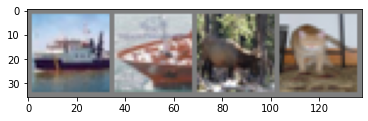

 ship  ship  deer   cat


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지 보기 함수
def imshow(img):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# 학습용 이미지 무작위 선택
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# label 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### CNN Modeling

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear (120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

### Loss Function & Optimizer

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Training

In [20]:
num_epoch = 10

for epoch in range(num_epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()   # don't forget to zero the gradient
        
        # forward + backward + optimization
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.225
[1,  4000] loss: 1.884
[1,  6000] loss: 1.716
[1,  8000] loss: 1.591
[1, 10000] loss: 1.539
[1, 12000] loss: 1.491
[2,  2000] loss: 1.414
[2,  4000] loss: 1.393
[2,  6000] loss: 1.382
[2,  8000] loss: 1.324
[2, 10000] loss: 1.331
[2, 12000] loss: 1.281
[3,  2000] loss: 1.264
[3,  4000] loss: 1.231
[3,  6000] loss: 1.216
[3,  8000] loss: 1.232
[3, 10000] loss: 1.212
[3, 12000] loss: 1.212
[4,  2000] loss: 1.128
[4,  4000] loss: 1.158
[4,  6000] loss: 1.115
[4,  8000] loss: 1.159
[4, 10000] loss: 1.138
[4, 12000] loss: 1.147
[5,  2000] loss: 1.064
[5,  4000] loss: 1.075
[5,  6000] loss: 1.077
[5,  8000] loss: 1.074
[5, 10000] loss: 1.065
[5, 12000] loss: 1.093
[6,  2000] loss: 0.988
[6,  4000] loss: 1.006
[6,  6000] loss: 1.007
[6,  8000] loss: 1.029
[6, 10000] loss: 1.021
[6, 12000] loss: 1.041
[7,  2000] loss: 0.934
[7,  4000] loss: 0.960
[7,  6000] loss: 0.989
[7,  8000] loss: 0.973
[7, 10000] loss: 0.985
[7, 12000] loss: 1.000
[8,  2000] loss: 0.867
[8,  4000] 

### Saving

In [21]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Evaluation

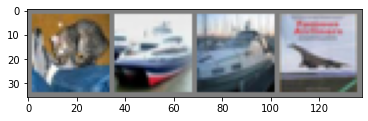

Ground Truth:    cat  ship  ship plane
Predicted:    cat   car plane plane
Accuracy of the network on the 10000 test images: 59 %


In [22]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# show image
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' %classes[labels[j]] for j in range(4)))

# Loading model
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

### Accuracy by Class

In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 63 %
Accuracy of  bird : 40 %
Accuracy of   cat : 40 %
Accuracy of  deer : 69 %
Accuracy of   dog : 40 %
Accuracy of  frog : 65 %
Accuracy of horse : 71 %
Accuracy of  ship : 69 %
Accuracy of truck : 85 %
